## Import and Read Dataset

In [12]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt

In [13]:
# Dataset Mentah

dataset_summary_df = pd.read_csv ("../Dataset/Global News Dataset Summary.csv", encoding='iso-8859-1')
dataset_summary_df

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...
...,...,...,...,...,...,...
4509,Mansha Mahajan,"24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...,http://indiatoday.intoday.in/story/rasna-eyes-...,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m..."
4510,Dishant Sharma,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...,http://indiatoday.intoday.in/story/sachin-tend...,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...
4511,Tanya Dhingra,"03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...,http://www.hindustantimes.com/bollywood/secret...,"Aamir Khan, while talking about reality shows ...","Aamir Khan, whose last film Dangal told the st..."
4512,Pragya Swastik,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused...",http://indiatoday.intoday.in/story/singer-asha...,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...


In [14]:
# Dataset Mentah

dataset_raw_df = pd.read_csv ("../Dataset/Global News Dataset Summary More.csv", encoding='iso-8859-1')
dataset_raw_df

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


## Preprocessing Dataset

In [15]:
pre1 =  dataset_raw_df.iloc[:,0:2].copy()
# pre1['head + text'] = pre1['headlines'].str.cat(pre1['text'], sep =" ") 

pre2 = dataset_summary_df.iloc[:,0:6].copy()
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

In [16]:
pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

In [17]:
pre.head()

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


In [18]:
# Bersih-bersih kalau ada whitespace atau ada simbol simbol yang aneh

import re

def text_strip(column):
    for row in column:
        
        # Jangan ubah urutan regex

        # Remove escape characters
        row = re.sub(r"(\\t|\\r|\\n|\t|\r|\n)", ' ', str(row)).lower()
        # Remove consecutive occurrences of special characters
        row = re.sub(r"(__+|-+|~+|\++|\.\.+)", ' ', row)
        # Remove various special characters
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', row)
        # Remove 'mailto:'
        row = re.sub(r"(mailto:)", ' ', row)
        # Remove '\x9*'
        row = re.sub(r"(\\x9\d)", ' ', row)
        # Replace 'INC' followed by numbers with 'INC_NUM'
        row = re.sub(r"([iI][nN][cC]\d+)", 'INC_NUM', row)
        # Replace 'CM' or 'CHG' followed by numbers with 'CM_NUM'
        row = re.sub(r"([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', row)
        # Remove full stop, dash, and colon at the end of words
        row = re.sub(r"(\.\s+|\-\s+|\:\s+)", ' ', row)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        
        row = re.sub(r"(pilihan\seditor).*", '', row)
        row = re.sub(r"tempo.co|info\snasional|suara.com", '', str(row)).lower()

        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single characters hanging between 2 spaces

        yield row

In [19]:
# Sample input
input_text = "ini adalah contoh teks dengan karakter escape \n dan \t, beberapa spasi, karakter khusus seperti @#$, INC123, CM456, dan CHG789, titik., tanda hubung-, dan titik dua: di akhir kata. ini adalah sebuah tautan: https://contoh.com, dan satu lagi: http://contoh.net/browse/sdf-123. Mungkin ada beberapa email seperti mailto:contoh@contoh.com. Juga, ada beberapa situs web seperti tempo.co, info nasional, dan suara.com. Terakhir, ada beberapa karakter tunggal di antara a spasi."

# Apply the text_strip function to the input text
cleaned_text = next(text_strip([input_text]))

# Print the cleaned text
print(cleaned_text)

ini adalah contoh teks dengan karakter escape dan beberapa spasi karakter khusus seperti @#$ inc_num cm_num dan cm_num titik tanda hubung dan titik dua di akhir kata ini adalah sebuah tautan contoh.c dan satu lagi contoh.c 123 mungkin ada beberapa email seperti contoh@contoh.com juga ada beberapa situs web seperti dan terakhir ada beberapa karakter tunggal di antara spasi.


In [20]:
# Di apply bersih-bersih yang tadi

brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

In [21]:
from time import time
import spacy

nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

# Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
# If data loss seems to be happening (i.e len(text) = 50 instead of 75, etc.), decrease the batch_size parameter

t = time()

In [22]:
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=1000, n_process=-1)]
print('Time to clean up text: {} mins'.format(round((time() - t) / 60, 2)))

print('Example Text : ', text[25])

Time to clean up text: 1.15 mins
Example Text :  former windies fast bowler curtly ambrose dismissed seven australian batsmen within span of 32 balls giving away just one run in test match on january 30 1993 ambrose spell helped his team bowl out australia for 119 in the first innings after being 85 for at one point ambrose ended with first innings figures of 18 25 7.


In [23]:
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=1000, n_process=-1)]
print('Time to clean up summary: {} mins'.format(round((time() - t) / 60, 2)))

print('Example Summary : ', summary[25])

Time to clean up summary: 1.54 mins
Example Summary :  _START_ pacer once took wickets for just run in 32 balls in test _END_


In [25]:
dataset_df = pre

In [26]:
dataset_df['cleaned_text'] = pd.Series(text)
dataset_df['cleaned_summary'] = pd.Series(summary)

In [27]:
# Menghitung panjang text & summary

text_count = []
summary_count = []

for sent in dataset_df['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in dataset_df['cleaned_summary']:
    summary_count.append(len(sent.split()))

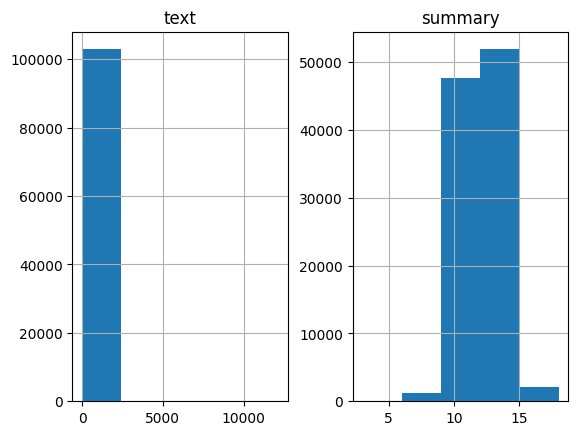

In [28]:
#Dijadiin graph biar keliatan rata-rata text itu panjangnya berapa

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count
graph_df.hist(bins = 5)
plt.show()

In [29]:
# Dari graph kelihatan kalo mayoritas summary tuh ada di rentan 100 kata
# Check how much % of summary have 0-100 words

cnt=0
for i in dataset_df['cleaned_summary']:
    if(len(i.split())<=85):
        cnt=cnt+1
print("% of Text that have 0 - 85 word = ", (round(cnt/len(dataset_df['cleaned_summary']) * 100, 2)), "%")

% of Text that have 0 - 85 word =  100.0 %


In [30]:
# Dari graph kelihatan kalo mayoritas text tuh ada di rentan 512 kata
# Check how much % of text have 0-512 words

cnt=0
for i in dataset_df['cleaned_text']:
    if(len(i.split())<=512):
        cnt=cnt+1
print("% of Text that have 0 - 512 word = ", (round(cnt/len(dataset_df['cleaned_text']) * 100, 2)), "%")

% of Text that have 0 - 512 word =  99.11 %


In [31]:
# Model to summarize the text between 0-100 words for Summary and 0-512 words for Text
# Diset max nya untuk buang outlier

max_text_len=100
max_summary_len=15

In [32]:
# Select the Summaries and Text between max len defined above

cleaned_text =np.array(dataset_df['cleaned_text'])
cleaned_summary=np.array(dataset_df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [33]:
post_pre = post_pre[post_pre['text'] != 'nan']
post_pre = post_pre[post_pre['summary'] != '_START_ nan _END_']

In [34]:
post_pre

,text,summary
0,saurav kant an alumnus of upgrad and iiit pg p...,_START_ upgrad learner switches to career in m...
1,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...
2,new zealand defeated india by wickets in the f...,_START_ new zealand end rohit sharma led india...
3,with aegon life iterm insurance plan customers...,_START_ aegon life iterm insurance plan helps ...
4,speaking about the sexual harassment allegatio...,_START_ have known hirani for yrs what if meto...
...,...,...
98157,sanira mediratta 03 may 2017 wednesday indiato...,_START_ abhishek pic appears on admit card for...
98159,sanira mediratta 02 may 2017 tuesday indiatoda...,_START_ selena attends met gala with rumoured ...
98166,dishant sharma 25 apr 2017 tuesday indiatoday....,_START_ south african international charged wi...
98187,akshita jain 08 mar 2017 wednesday indiatoday....,_START_ india offers to give up veto power tem...


In [35]:
post_pre.to_csv ('../Dataset/Indonesian News Dataset Preprocessed 3.csv', index=False, sep=';')